# HACKATHON - Taxi Trip Fare Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,6]

In [7]:
train=pd.read_csv('train.csv')
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [8]:
test=pd.read_csv('test.csv')
test.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


In [11]:
# Shape of the data
train.shape,test.shape

((35000, 20), (15000, 19))

# Univariate Analysis

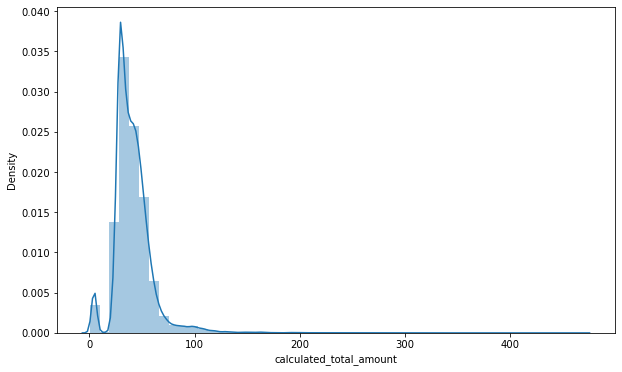

In [13]:
# Target variable
sns.distplot(train['calculated_total_amount'])
plt.show()

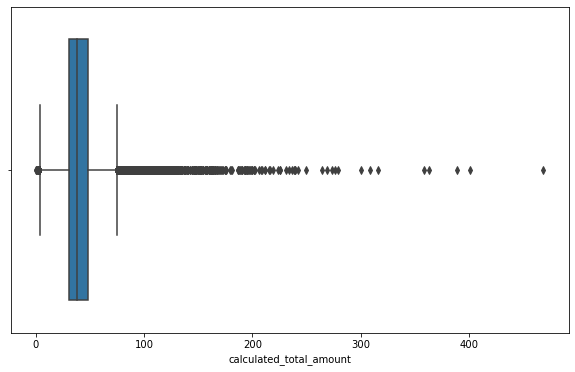

In [14]:
sns.boxplot(train['calculated_total_amount'])
plt.show()

Build a base model : Average of the target variable

In [28]:
predicted=train['calculated_total_amount'].mean()
submission=pd.DataFrame({'year':test.year,'calculated_total_amount':predicted})
submission.to_csv('Basemodel_test.csv',index=False) 
# RMSE: 19.49345

In [29]:
predicted

41.32424857143727

In [30]:
submission.head()

,year,calculated_total_amount
0,2018,41.324249
1,2018,41.324249
2,2018,41.324249
3,2018,41.324249
4,2018,41.324249


In [31]:
submission.shape

(15000, 2)

In [33]:
submission=submission.drop('year',axis=1)

In [35]:
# List of Numeric variables:
train.select_dtypes(include=[np.number]).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [37]:
cols=['trip_distance', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration','calculated_total_amount']

In [38]:
len(cols)

9

In [43]:
nrows=2
ncols=5
iterator=1

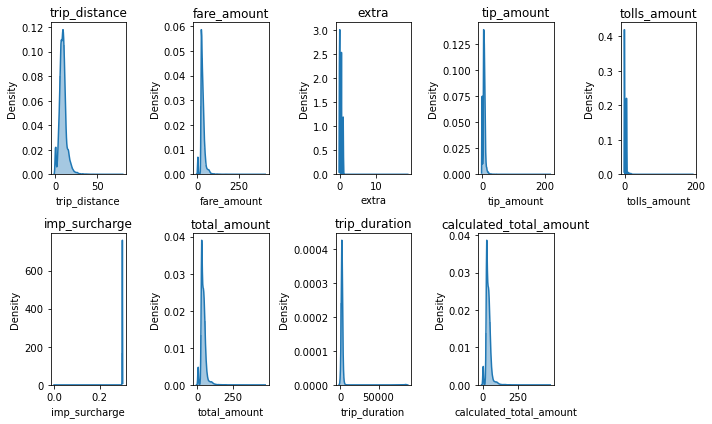

In [44]:
# Distribution plot for the numerical variables
for i in cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(train.loc[:,i])
    plt.title(i)
    iterator=iterator+1
    
plt.tight_layout()
plt.show()

In [48]:
# Statistical summary of num variables
train.loc[:,cols].describe()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,31.920911,0.320337,6.142190,2.262871,0.299940,41.442469,2257.38360,41.324249
std,4.496854,14.689516,0.402590,4.397599,3.578315,0.004242,19.241543,5112.41526,19.167043
min,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.310000,1.00000,0.310000
25%,6.470000,24.000000,0.000000,4.460000,0.000000,0.300000,30.350000,1448.00000,30.300000
50%,8.700000,29.000000,0.000000,6.050000,0.000000,0.300000,38.470000,1862.00000,38.460000
75%,10.990000,36.000000,0.500000,8.100000,5.760000,0.300000,48.352500,2340.00000,48.200000
max,79.010000,400.000000,18.500000,215.000000,189.500000,0.300000,468.350000,86347.00000,468.350000


In [49]:
train.loc[train['total_amount']>train['calculated_total_amount']].shape

(17601, 20)

In [50]:
train.loc[train['total_amount']==train['calculated_total_amount']].shape

(17, 20)

In [51]:
train.loc[train['total_amount']<train['calculated_total_amount']].shape

(17382, 20)

We will create a new feature on this total amount during feature engineering.

In [53]:
# Combined train and test
combined=pd.concat([train,test],ignore_index=True)

In [54]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [55]:
combined.isnull().sum()
# No null values present in the data.
# Calculated_total_amount has the missing values which we need to predict for the hackathon.

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [56]:
combined.tail()
# Test data showing the null values.

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,1121.0,NaN
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,1744.0,NaN
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,1362.0,NaN
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,101.0,NaN
49999,9.25,1,N,1,27.0,0.0,0.5,5.03,5.76,0.3,38.59,138,107,2018,9,23,6,10,2444.0,NaN


Univariate analysis of catagorical variables

In [58]:
combined.select_dtypes(include=[np.object]).columns

Index(['store_and_fwd_flag'], dtype='object')

In [59]:
cat_cols=['rate_code','payment_type','mta_tax','year','month','store_and_fwd_flag']

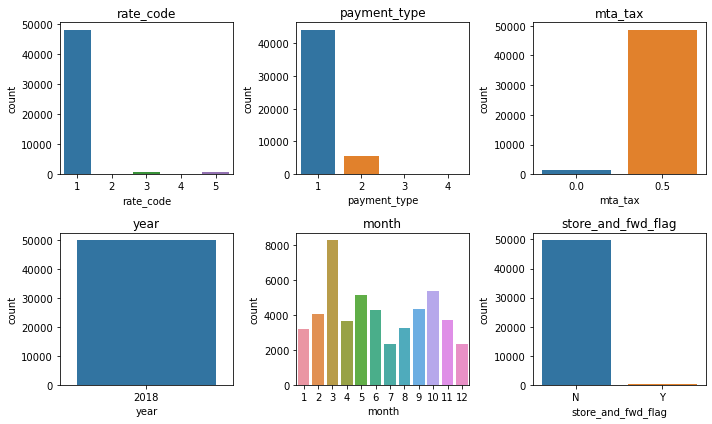

In [63]:
# Countplot for the categorical variables
nrows=2
ncols=3
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

It shows that the categorical variables are highly imbalanced.

# Bivariate Analysis

Categorical variables vs Numerical variables

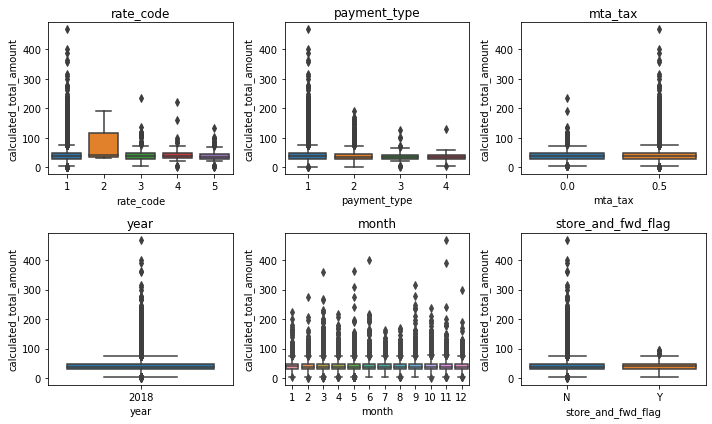

In [64]:
# Boxplot showing the relationship of the categorical variables with the target variable.
cat_cols=['rate_code','payment_type','mta_tax','year','month','store_and_fwd_flag']
nrows=2
ncols=3
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x=combined.loc[:,i],y=combined['calculated_total_amount'])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

Bivariate Analysis : Number vs number

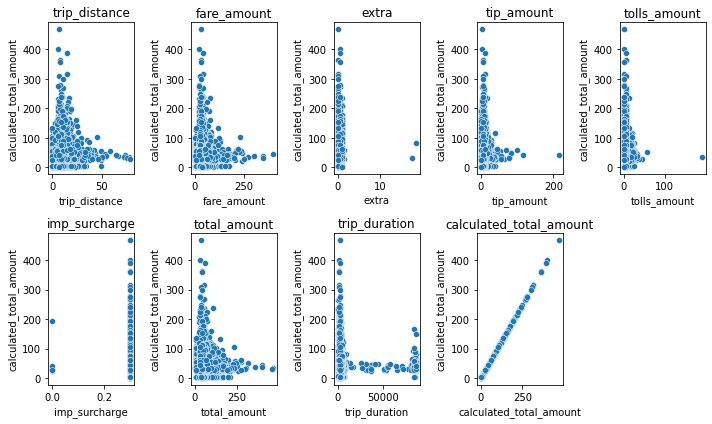

In [67]:
# Scatterplot between the numerical variables and the target variable.
nrows=2
ncols=5
iterator=1
for i in cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x=combined.loc[:,i],y=combined['calculated_total_amount'])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

<AxesSubplot:>

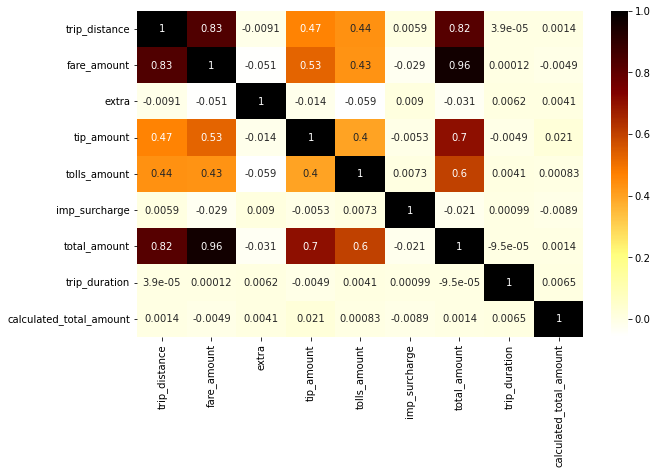

In [69]:
# Heatmap
sns.heatmap(combined.loc[:,cols].corr(),annot=True,cmap='afmhot_r')

In [70]:
cols

['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'imp_surcharge',
 'total_amount',
 'trip_duration',
 'calculated_total_amount']

In [72]:
# Statistical test to verify which columns are important
import scipy.stats as stats
for i in cols:
    teststats,pvalue=stats.ttest_ind(train.loc[:,i],train['calculated_total_amount'])
    print('Pvalue for',i,'var is',np.round(pvalue,6))

Pvalue for trip_distance var is 0.0
Pvalue for fare_amount var is 0.0
Pvalue for extra var is 0.0
Pvalue for tip_amount var is 0.0
Pvalue for tolls_amount var is 0.0
Pvalue for imp_surcharge var is 0.0
Pvalue for total_amount var is 0.415445
Pvalue for trip_duration var is 0.0
Pvalue for calculated_total_amount var is 1.0


# Outlier removal

In [121]:
q1=combined.quantile(0.25)
q3=combined.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
wt_outliers=combined

In [122]:
wt_outliers.shape

(50000, 20)

# Feature Engineering

In [123]:
wt_outliers.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


<AxesSubplot:xlabel='hour_of_day', ylabel='calculated_total_amount'>

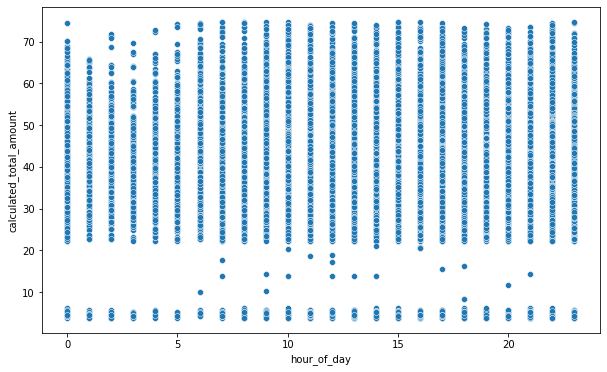

In [80]:
sns.scatterplot(data=wt_outliers,x='hour_of_day',y='calculated_total_amount')

<AxesSubplot:xlabel='hour_of_day', ylabel='calculated_total_amount'>

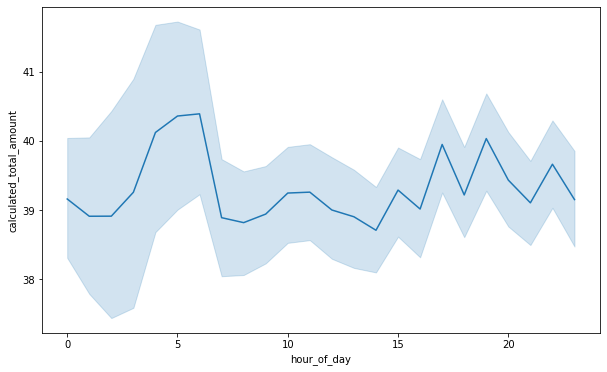

In [82]:
sns.lineplot(data=wt_outliers,x='hour_of_day',y='calculated_total_amount')

In [81]:
wt_outliers['day_of_week'].value_counts()

1    5587
2    5441
3    5421
4    4974
0    4555
6    3997
5    3602
Name: day_of_week, dtype: int64

In [124]:
wt_outliers['Rush_hour']=wt_outliers.hour_of_day.apply(lambda x:1 if x in [10,15,16,17,18,19,20] else 0)

In [125]:
pd.set_option('display.max_columns',500)

In [126]:
wt_outliers.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0


<AxesSubplot:xlabel='Rush_hour', ylabel='calculated_total_amount'>

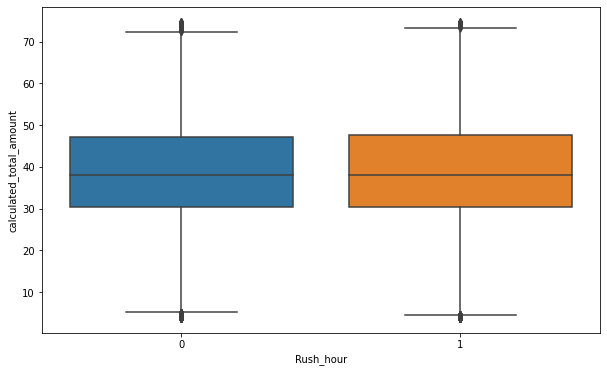

In [91]:
sns.boxplot(x='Rush_hour',y='calculated_total_amount',data=wt_outliers)

In [94]:
wt_outliers.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,0
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0
5,12.65,1,N,1,41.5,0.0,0.5,0.02,5.76,0.3,48.08,138,100,2018,1,8,0,7,2029.0,30.95,0


In [127]:
# Creating a new variable 'target_difference'
wt_outliers['target_diff']=wt_outliers['total_amount']-wt_outliers['calculated_total_amount']
def difference(x):
    if x>0:
        return('Discount')
    elif(x==0):
        return('Equal')
    else:
        return('Excess')
wt_outliers['target_diff_cat']=wt_outliers.target_diff.apply(difference)

In [128]:
wt_outliers.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour,target_diff,target_diff_cat
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,0,16.40,Discount
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,-32.85,Excess
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,27.31,Discount
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,42.01,Discount
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3.56,Discount


In [102]:
# Day wise Average revenue
wt_outliers.groupby(['day_of_week'])['calculated_total_amount'].describe()
# Initiate clustering since we have no other approach or specific pattern.

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,3158.0,39.574481,12.225012,3.8,30.36,38.565,47.5750,74.82
1,3842.0,38.912298,12.255614,3.8,30.30,37.800,46.8600,74.80
2,3732.0,39.144333,12.369047,3.8,30.35,37.965,47.3400,74.68
3,3772.0,39.386368,12.292832,3.8,30.36,38.150,47.4700,74.83
4,3430.0,39.182822,12.487729,3.8,30.35,38.060,47.5600,74.47
5,2516.0,39.463215,12.279383,3.8,30.95,38.760,47.4625,74.45
6,2781.0,39.349917,12.058559,3.8,30.36,38.290,47.4600,74.82


In [104]:
wt_outliers.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'Rush_hour',
       'target_diff', 'target_diff_cat'],
      dtype='object')

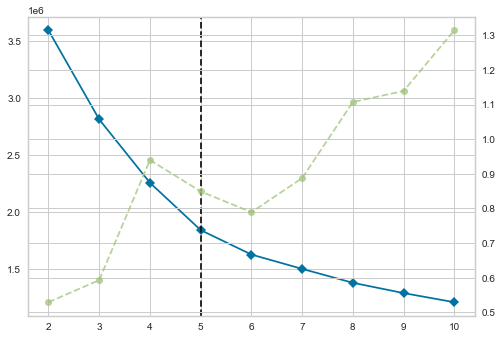

In [129]:
# Find the cluster count for 'month', 'day', 'day_of_week','hour_of_day'
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans=KMeans()
elbow=KElbowVisualizer(estimator=kmeans,random_state=0)
cluster_data=wt_outliers.loc[:,['month', 'day', 'day_of_week','hour_of_day']]
elbow.fit(cluster_data)
plt.show()

In [130]:
# Use 5 clusters to generate the labels.
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(cluster_data)
wt_outliers['Cluster_labels']=kmeans.labels_

In [131]:
wt_outliers.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour,target_diff,target_diff_cat,Cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,0,16.40,Discount,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,-32.85,Excess,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,27.31,Discount,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,42.01,Discount,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3.56,Discount,1


In [113]:
combined['payment_type'].value_counts()

1    44109
2     5654
3      179
4       58
Name: payment_type, dtype: int64

In [114]:
wt_outliers.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush_hour,target_diff,Cluster_labels
count,33577.000000,33577.0,33577.0,33577.000000,33577.000000,33577.0,33577.000000,33577.000000,3.357700e+04,33577.000000,33577.000000,33577.000000,33577.0,33577.000000,33577.000000,33577.000000,33577.000000,33577.000000,23231.000000,33577.000000,23231.000000,33577.000000
mean,8.787064,1.0,1.0,30.356245,0.327445,0.5,6.600938,2.177840,3.000000e-01,40.271716,161.424130,147.740269,2018.0,6.104625,15.188850,2.818000,14.064300,1931.724067,39.268561,0.377491,0.984007,1.965065
std,2.935049,0.0,0.0,6.978947,0.371670,0.0,2.377193,2.803634,3.147529e-14,9.932299,50.881632,73.533059,0.0,3.294503,8.809265,1.914192,6.118884,601.321639,12.289767,0.484766,15.831885,1.441497
min,0.500000,1.0,1.0,21.130000,0.000000,0.5,0.000000,0.000000,3.000000e-01,22.300000,51.000000,1.000000,2018.0,1.000000,1.000000,0.000000,0.000000,113.000000,3.800000,0.000000,-49.110000,0.000000
25%,6.700000,1.0,1.0,24.500000,0.000000,0.5,5.050000,0.000000,3.000000e-01,31.550000,138.000000,89.000000,2018.0,3.000000,6.000000,1.000000,10.000000,1483.000000,30.360000,0.000000,-9.610000,1.000000
50%,8.760000,1.0,1.0,29.000000,0.000000,0.5,6.500000,0.000000,3.000000e-01,39.300000,138.000000,141.000000,2018.0,6.000000,15.000000,3.000000,15.000000,1862.000000,38.160000,0.000000,0.880000,2.000000
75%,10.610000,1.0,1.0,35.000000,0.500000,0.5,8.100000,5.760000,3.000000e-01,47.470000,189.000000,226.000000,2018.0,9.000000,24.000000,4.000000,19.000000,2302.000000,47.460000,1.000000,11.400000,3.000000
max,17.690000,1.0,1.0,54.000000,1.000000,0.5,13.500000,14.260000,3.000000e-01,74.770000,265.000000,265.000000,2018.0,12.000000,31.000000,6.000000,23.000000,3684.000000,74.830000,1.000000,61.760000,4.000000


In [132]:
# Drop the insignificant variables:
new=wt_outliers.drop(['year','imp_surcharge','month','day','day_of_week','hour_of_day','pickup_location_id','dropoff_location_id'],axis=1)

In [133]:
new.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,Rush_hour,target_diff,target_diff_cat,Cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30,0,16.40,Discount,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40,1,-32.85,Excess,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36,0,27.31,Discount,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30,1,42.01,Discount,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80,0,3.56,Discount,1


In [137]:
# Split the data into train and test.
train.shape,test.shape

((35000, 20), (15000, 19))

In [135]:
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

In [136]:
newtrain.shape,newtest.shape

((35000, 16), (15000, 16))

In [139]:
newtest.head(1)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,Rush_hour,target_diff,target_diff_cat,Cluster_labels
35000,15.7,1,N,2,45.0,0.0,0.5,0.0,0.0,45.8,3967.0,NaN,1,NaN,Excess,1


In [140]:
newtrain=newtrain.drop(['target_diff_cat','target_diff'],axis=1)
newtest=newtest.drop(['calculated_total_amount','target_diff_cat','target_diff'],axis=1)

In [141]:
newtrain.shape,newtest.shape

((35000, 14), (15000, 13))

Outlier Removal

In [143]:
q1=newtrain.quantile(0.25)
q3=newtrain.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
final=newtrain.loc[~((newtrain<ll)|(newtrain>ul)).any(axis=1)]
final.shape

(25047, 14)

In [145]:
final.select_dtypes(include=[np.number]).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_duration', 'calculated_total_amount', 'Rush_hour',
       'Cluster_labels'],
      dtype='object')

In [148]:
cat_cols=['rate_code', 'payment_type', 'mta_tax','store_and_fwd_flag','rush_hour']

ANOVA for payment type

In [149]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [177]:
model=sfa.ols('calculated_total_amount~payment_type',data=final).fit()
print(anova_lm(model))

                   df        sum_sq     mean_sq         F    PR(>F)
payment_type      1.0  2.236842e+02  223.684200  1.476934  0.224266
Residual      25046.0  3.793259e+06  151.451695       NaN       NaN


In [185]:
# Modelling 
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)

# Split the train data in X and y
X=newtrain.drop('calculated_total_amount',axis=1)
y=newtrain['calculated_total_amount']

pred=[]
lr=RandomForestRegressor()
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_iex]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))

In [191]:
# Generate the final output..
pd.DataFrame(pred).T.shape
output=pd.DataFrame(pred).T.mean(axis=1)
submission_rf=pd.DataFrame({'calculated_total_amount':output})
submission_rf.to_csv('RFmodel.csv',index=False)

In [192]:
submission_rf.head()

,calculated_total_amount
0,39.48800
1,41.01096
2,37.05628
3,35.64828
4,35.55908


In [194]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [198]:
## LIGHT GBM
# Split the train data in X and y
X=newtrain.drop('calculated_total_amount',axis=1)
y=newtrain['calculated_total_amount']
from lightgbm import LGBMRegressor
pred=[]
lr=LGBMRegressor()
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))

In [199]:
# Generate the final output..
pd.DataFrame(pred).T.shape
output=pd.DataFrame(pred).T.mean(axis=1)
submission_lgbm=pd.DataFrame({'calculated_total_amount':output})
submission_lgbm.to_csv('LGBM.csv',index=False)

In [201]:
## LASSO
# Split the train data in X and y
X=newtrain.drop('calculated_total_amount',axis=1)
y=newtrain['calculated_total_amount']
from lightgbm import LGBMRegressor
pred=[]
lr=Lasso()
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))

In [202]:
# Generate the final output..
pd.DataFrame(pred).T.shape
output=pd.DataFrame(pred).T.mean(axis=1)
submission_lasso=pd.DataFrame({'calculated_total_amount':output})
submission_lasso.to_csv('Lasso.csv',index=False)

In [209]:
# Stacking Model
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
basemodels=[('lr',LinearRegression()),('rf',RandomForestRegressor()),('gbm',GradientBoostingRegressor()),('lasso',Lasso())]
finalmodel=XGBRegressor()
stack=StackingRegressor(estimators=basemodels,final_estimator=finalmodel,cv=KFold(n_splits=5,shuffle=True,random_state=0))

In [211]:
pred=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(newtest))

In [212]:
# Generate the final output..
pd.DataFrame(pred).T.shape
output=pd.DataFrame(pred).T.mean(axis=1)
submission_stack=pd.DataFrame({'calculated_total_amount':output})
submission_stack.to_csv('Stackingmodel.csv',index=False)